In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle
from geopy.geocoders import Nominatim


# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# soporte para limpieza
import sys
sys.path.append("../")

import src.soporte as sp

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,10)

In [91]:
dif = pd.read_csv("../data/grades_conversion_table.csv", index_col=0)

In [92]:
dif.head(3)

,grade_id,grade_fra
0,0,-
1,1,-
2,2,-


In [2]:
mountain = pd.read_csv("../data/routes2.csv", index_col=0)

In [3]:
mountain.head(3)

,name_id,country,crag,sector,name,tall_recommend_sum,grade_mean,cluster,rating_tot,coord,lat,lon
0,0,and,montserrat,prohibitivo,diagonal de la x,-1,49.250000,3,-0.045211,"(-31.6262496, -64.4437191)",-31.626250,-64.443719
1,1,and,montserrat,prohibitivo,mehir,-1,49.000000,2,0.116464,"(33.4308245, 46.4636819)",33.430824,46.463682
2,3,and,tartareu,bombo suis,tenedor libre,0,44.333333,3,0.158449,"(-26.4537501, -54.6440551)",-26.453750,-54.644055


In [4]:
scaler = pd.read_csv("../data/climber_df.csv", index_col=0)

In [5]:
scaler.head(3)

,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
user_id,,,,,,,,,,,,,,,
1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009


In [60]:
scaler_country = scaler.groupby("country")["grades_max"].median().reset_index()
scaler_country = scaler_country[(scaler_country["country"] != "other")].sort_values(by = "grades_max", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

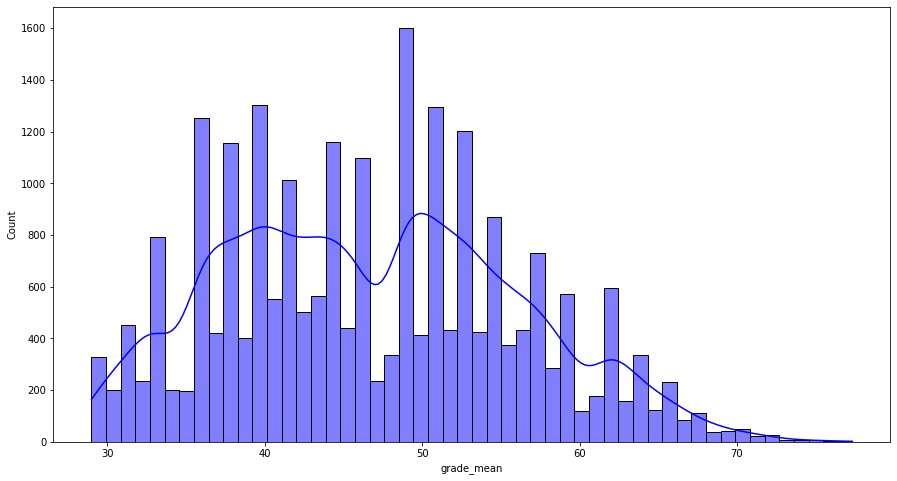

In [5]:
plt.figure(figsize=(15,8))
sns.histplot(mountain["grade_mean"], 
             kde = True, 
             color = "blue");

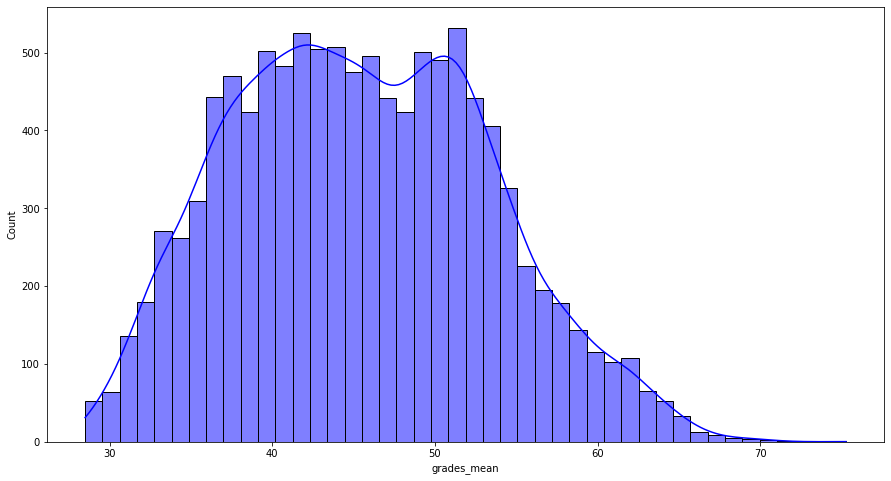

In [6]:
plt.figure(figsize=(15,8))
sns.histplot(scaler["grades_mean"], 
             kde = True, 
             color = "blue");

IndexError: index 4 is out of bounds for axis 0 with size 4

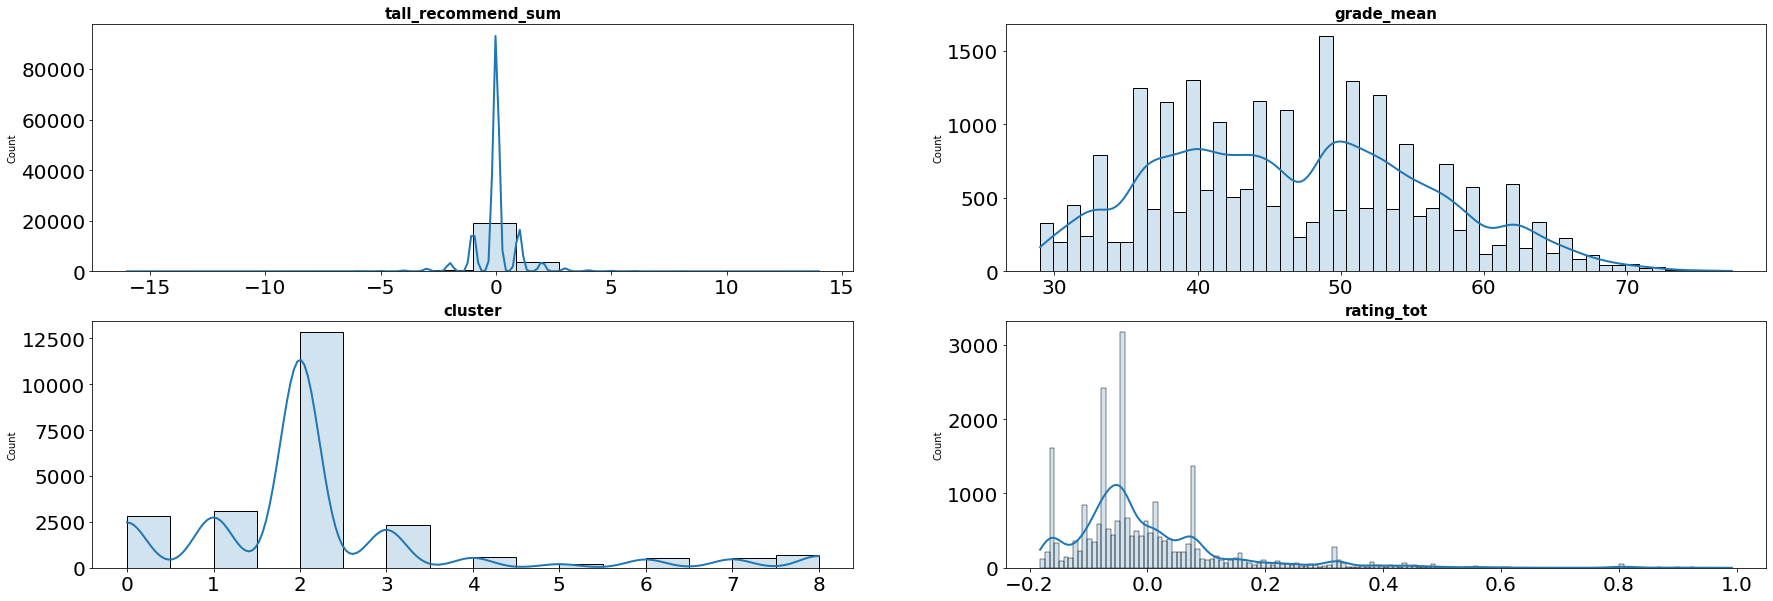

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

axes = axes.flat

columnas_numeric = mountain.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric[1:]): 
    sns.histplot(
        data = mountain,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
# fig.delaxes(axes[0])

fig.tight_layout()

In [15]:
df_ = mountain[(mountain["tall_recommend_sum"] > 1) | (mountain["tall_recommend_sum"] < -1)]
df_.head()

,name_id,country,crag,sector,name,tall_recommend_sum,grade_mean,cluster,rating_tot,coord,lat,lon
105,264,aus,blue mountains,boronia point,ancient mariner,2,37.047619,1,0.006537,"(41.2822707, -73.5001885)",41.282271,-73.500188
106,265,aus,blue mountains,boronia point,aneurysm,2,56.500000,1,0.025810,"(-37.9424539, 145.2805372)",-37.942454,145.280537
111,275,aus,blue mountains,boronia point,green eggs and ham,2,59.000000,2,0.036485,"(42.163686, -72.669161)",42.163686,-72.669161
113,277,aus,blue mountains,boronia point,lyptus,3,48.920000,8,0.034482,"(42.2159275, -121.8226588)",42.215927,-121.822659
114,279,aus,blue mountains,boronia point,mr curly,-3,32.214286,1,-0.043003,"(33.91973, -98.309804)",33.919730,-98.309804


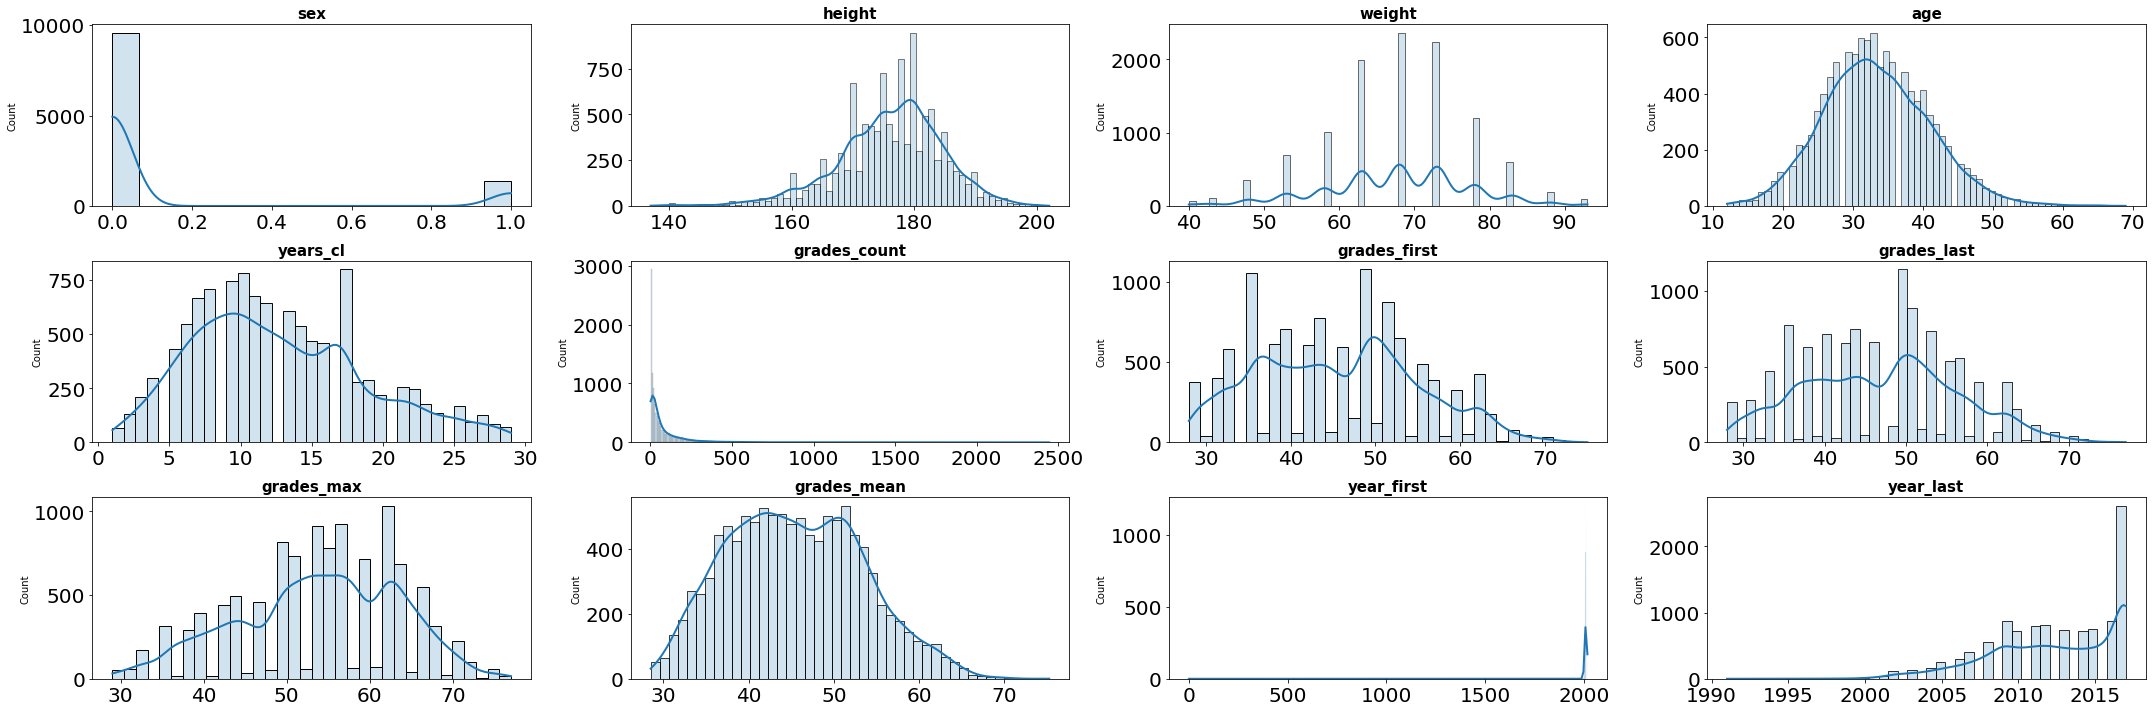

In [16]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

axes = axes.flat

columnas_numeric = scaler.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric[1:]): 
    sns.histplot(
        data = scaler,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
# fig.delaxes(axes[0])

fig.tight_layout()

IndexError: index 3 is out of bounds for axis 0 with size 3

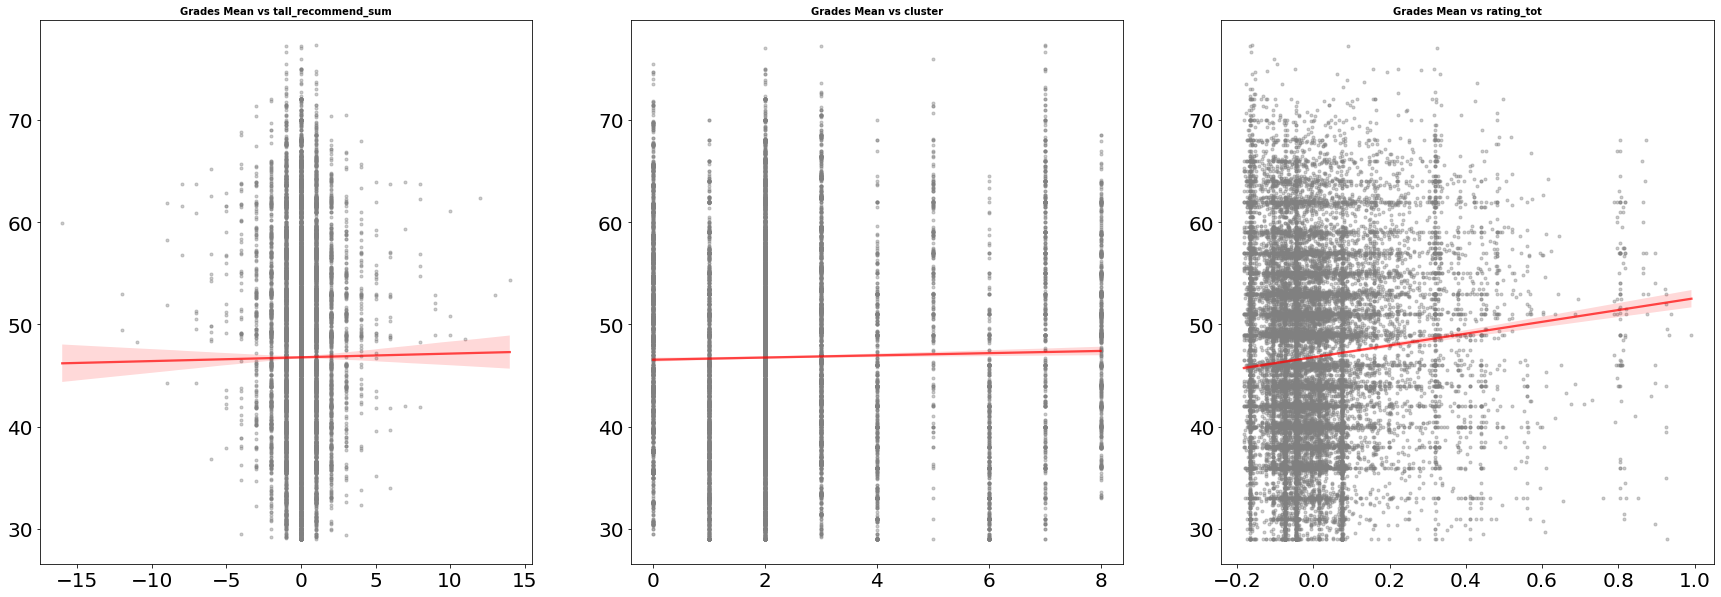

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = mountain.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("grade_mean")

for i, colum in enumerate(columnas_numeric[1:]):
    sns.regplot(
        x = mountain[colum], 
        y = mountain["grade_mean"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Grades Mean vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

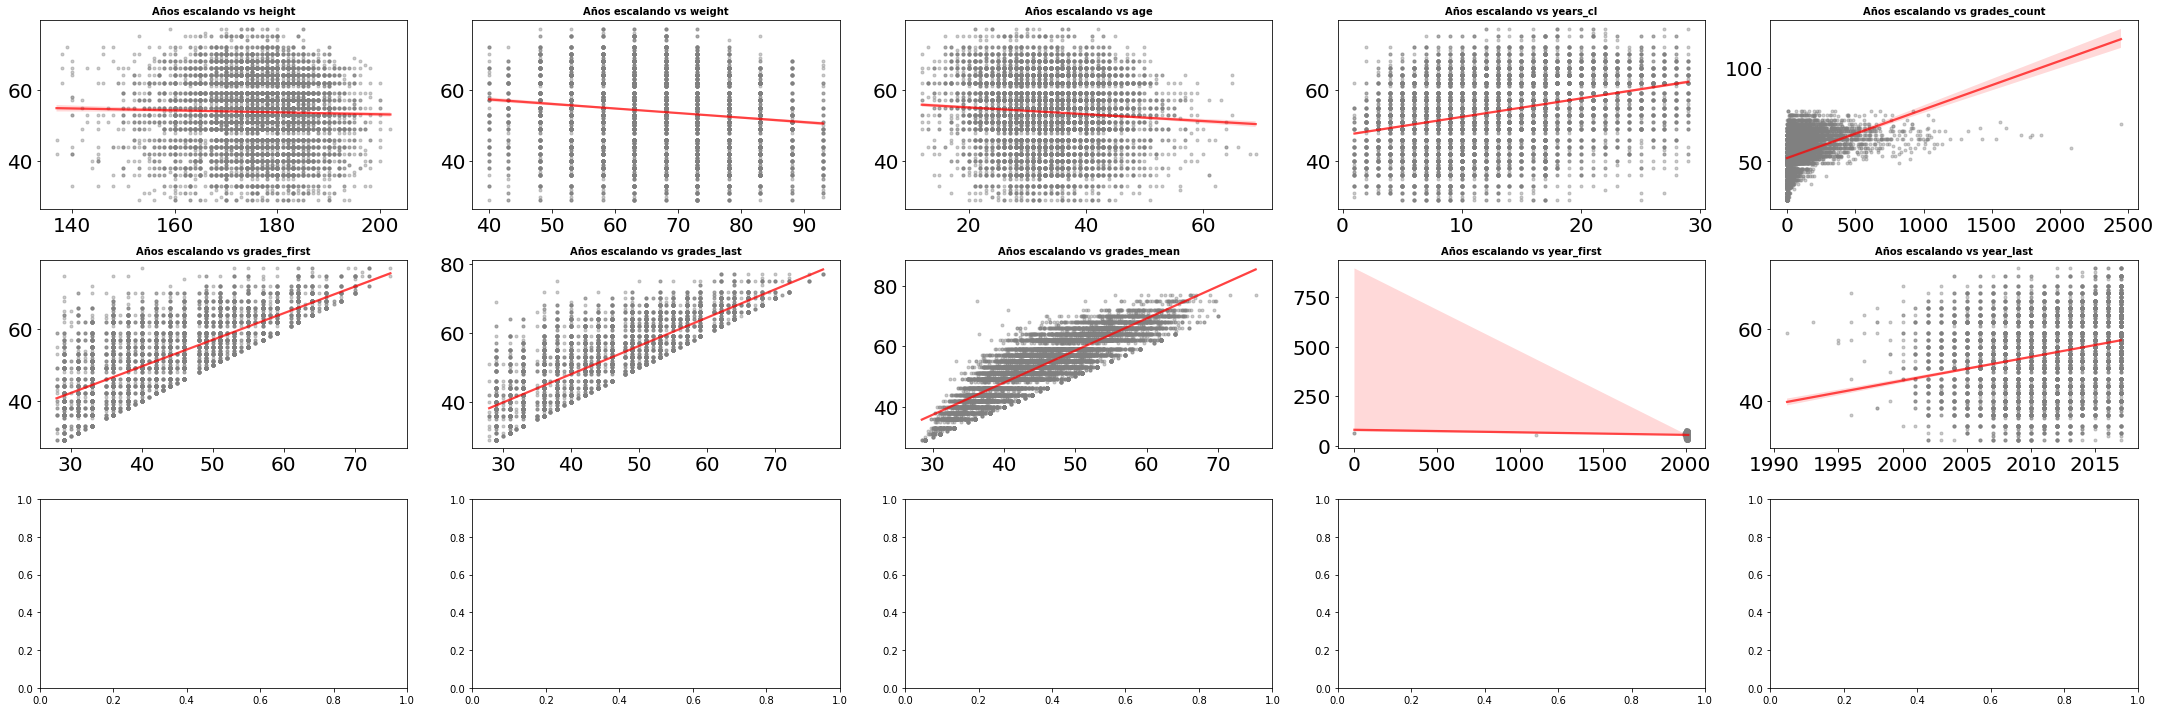

In [76]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = scaler.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("grades_max")

for i, colum in enumerate(columnas_numeric[1:]):
    sns.regplot(
        x = scaler[colum], 
        y = scaler["grades_max"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Años escalando vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

<BarContainer object of 10 artists>

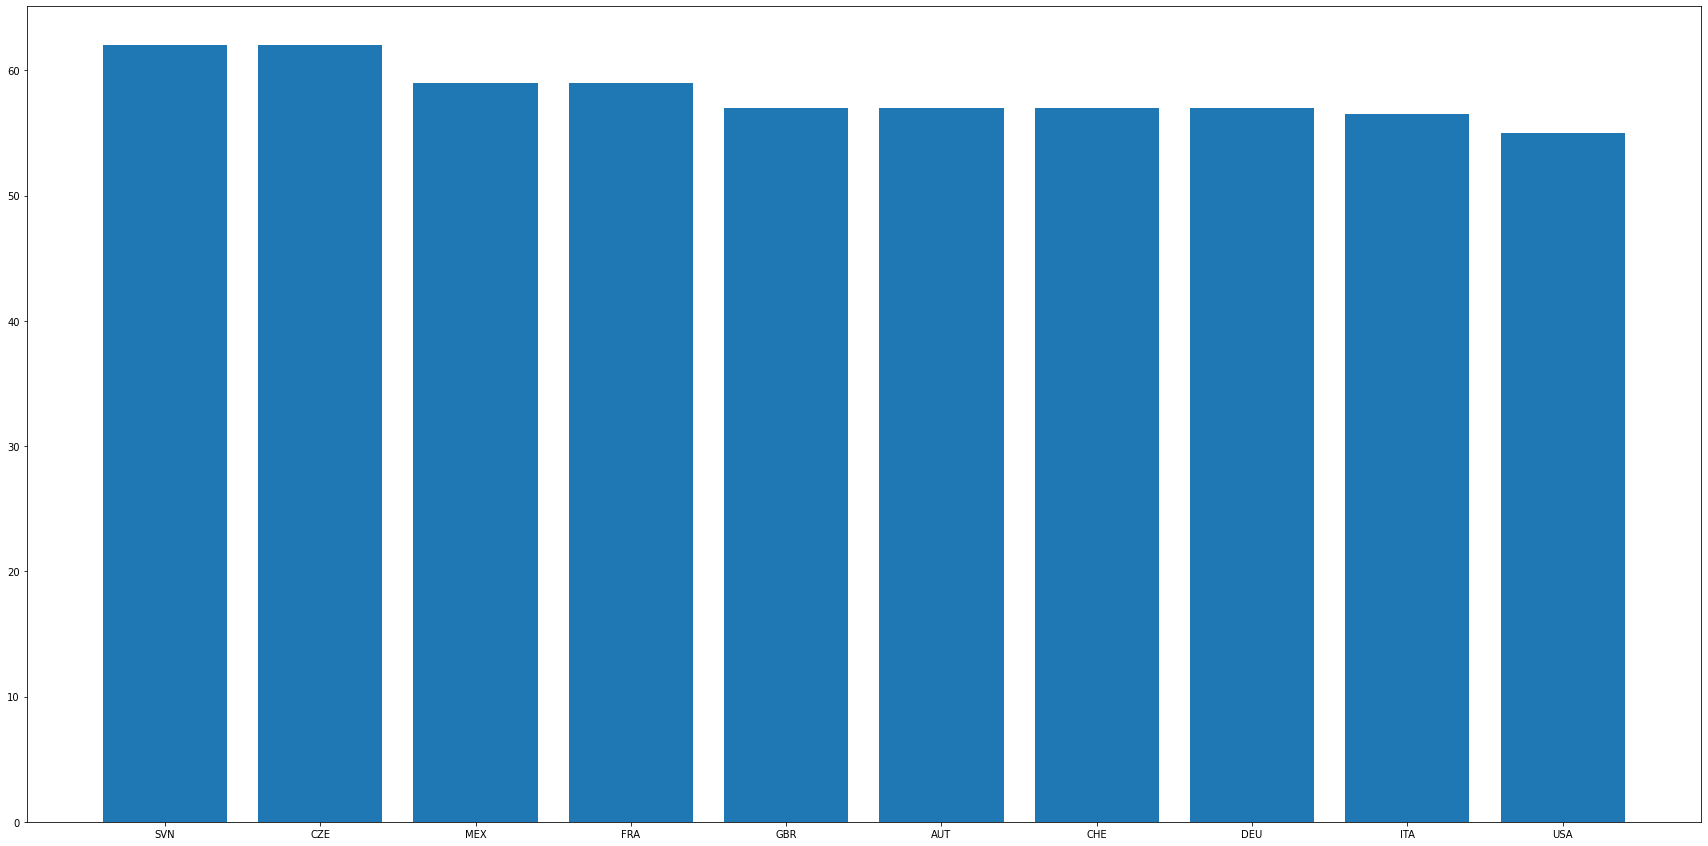

In [71]:
scaler_country = scaler.groupby("country")["grades_max"].median().reset_index()
scaler_country = scaler_country[(scaler_country["country"] != "other")].sort_values(by = "grades_max", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)

plt.bar(df["country"], df["grades_max"])

<BarContainer object of 10 artists>

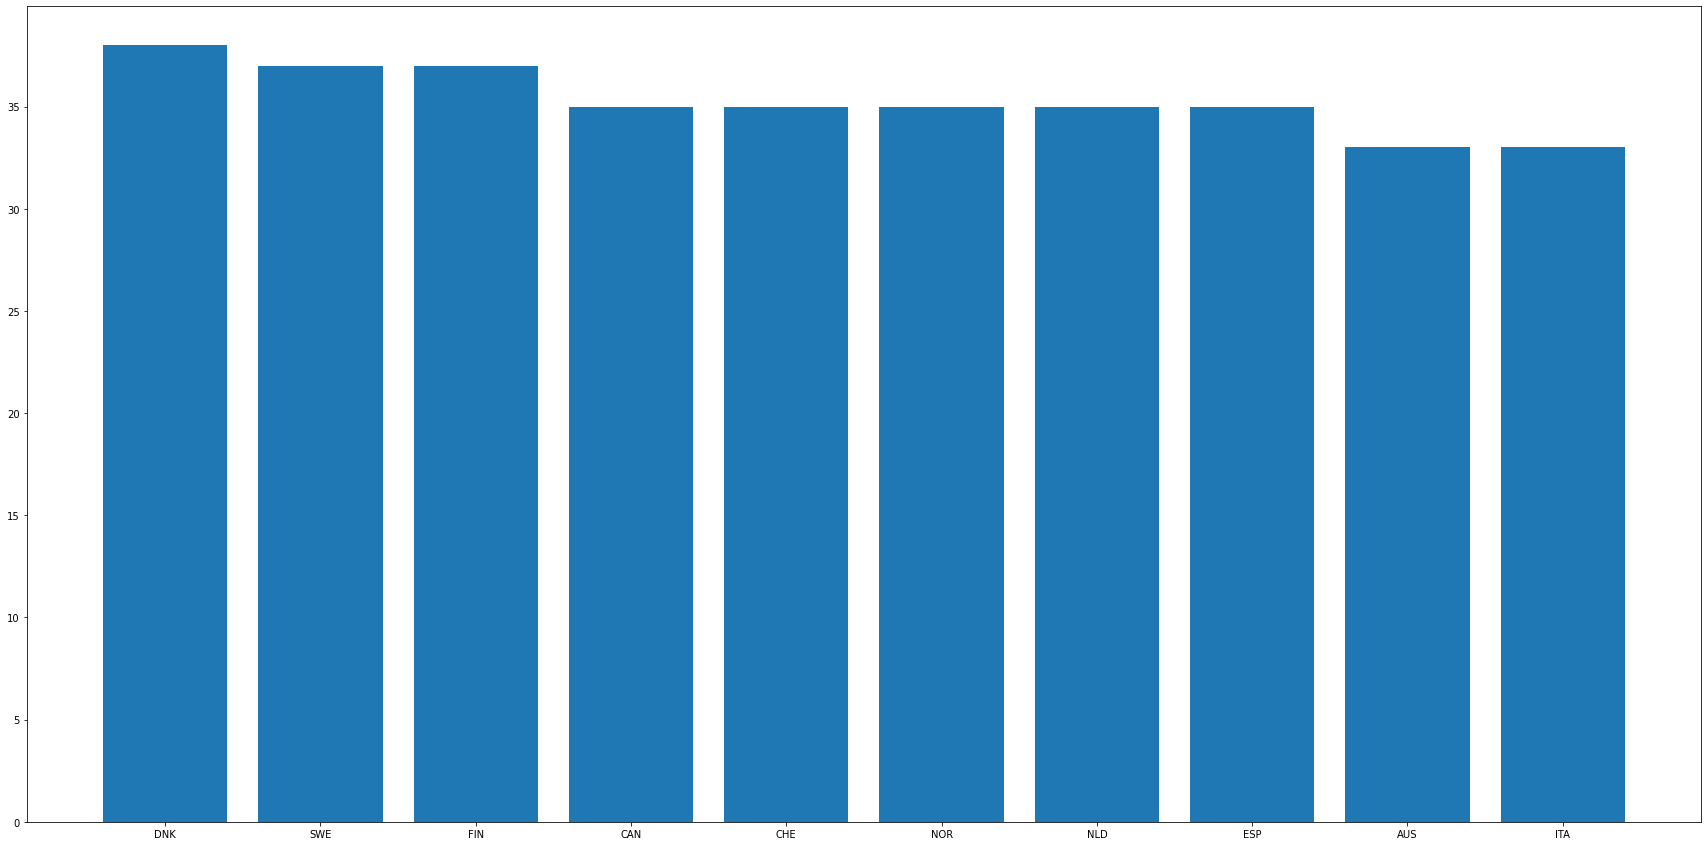

In [72]:
scaler_country = scaler.groupby("country")["age"].median().reset_index()
scaler_country = scaler_country.sort_values(by = "age", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)


plt.bar(df["country"][:10], df["age"])

<BarContainer object of 10 artists>

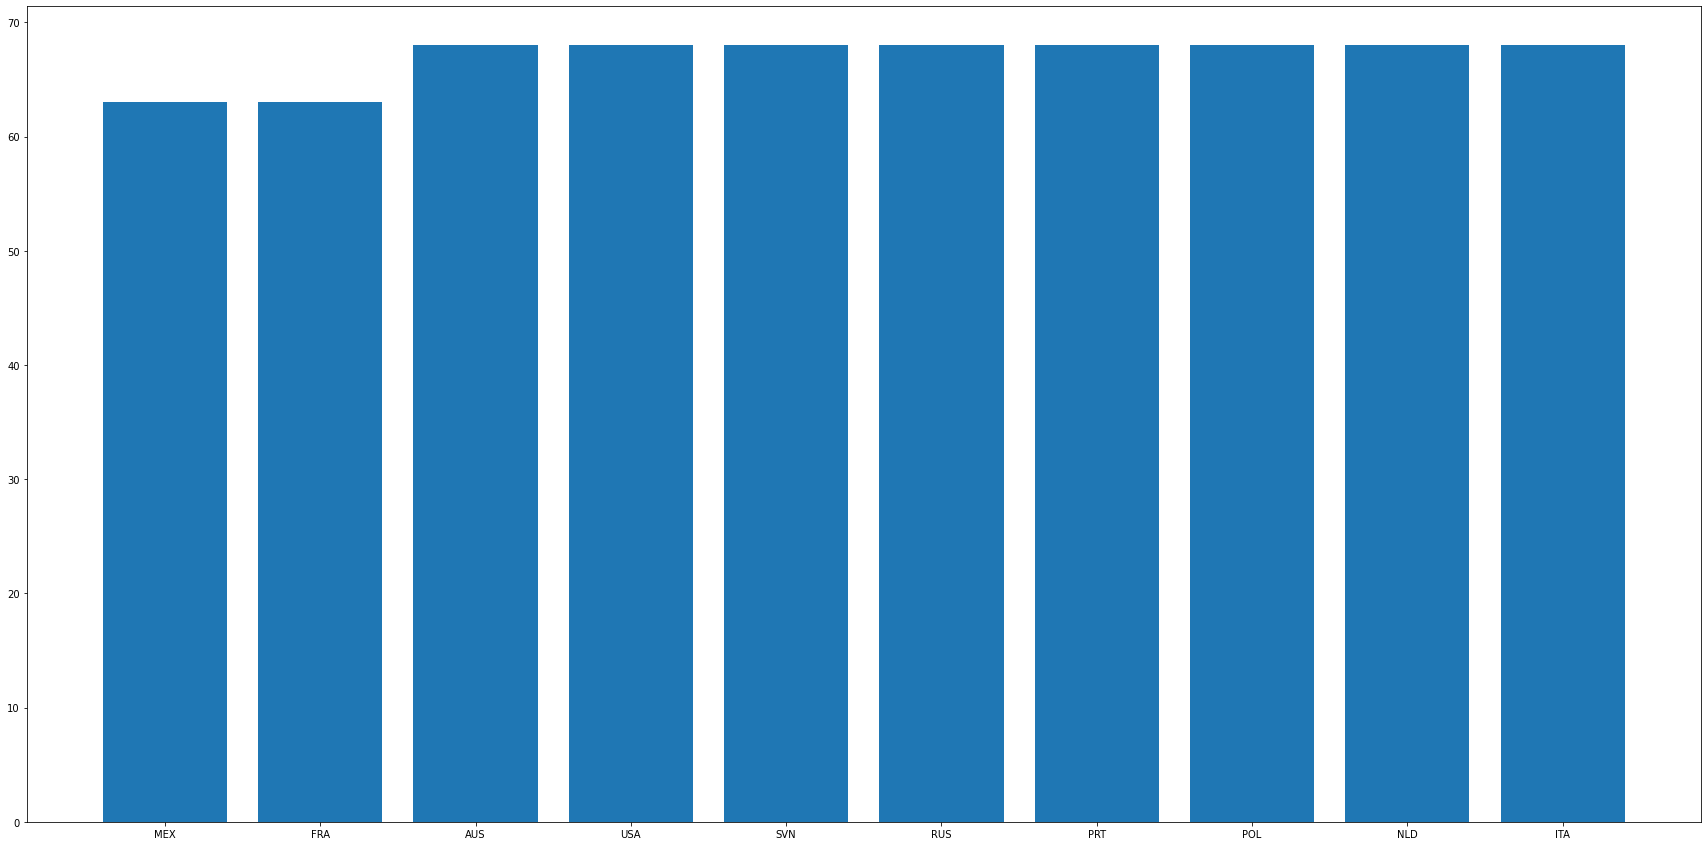

In [78]:
scaler_country = scaler.groupby("country")["weight"].median().reset_index()
scaler_country = scaler_country.sort_values(by = "weight", ascending=True)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)


plt.bar(df["country"], df["weight"])

<BarContainer object of 10 artists>

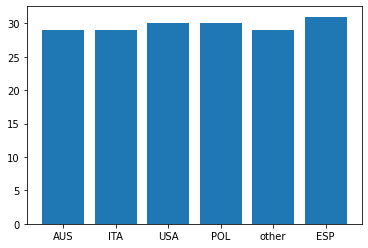

In [118]:
best_sacler = scaler[(scaler["age"] < 40) & (scaler["weight"] <=70) & (scaler["years_cl"] >= 10)]
best_sacler["grades_max"]

df = best_sacler.sort_values(by = "grades_max", ascending=True).head(10)


plt.bar(df["country"], df["grades_max"])

In [106]:
best_sacler = scaler[(scaler["age"] < 40) & (scaler["weight"] <=70) & (scaler["years_cl"] >= 10) & (scaler["country"] =="MEX")]
best_sacler["grades_max"].median()

59.0

In [113]:
best_sacler = scaler[(scaler["age"] < 40) & (scaler["weight"] <=70) & (scaler["years_cl"] >= 10) & (scaler["country"] =="FRA")]
best_sacler["grades_max"].median()

62.0

<img src = "../image/grados-escalada-niveles.jpg">

Se conidera un escalador de muy alto nivel cuando puedes superar una montana de grado <b>8b</b>

In [95]:
dif["grade_fra"][best_sacler["grades_max"].median()]

'9b'

In [102]:
dif["grade_fra"][scaler["grades_max"].median()]

'7b+'

In [ ]:
scaler_country = scaler.groupby("country")["grades_max"].median().reset_index()
scaler_country = scaler_country[(scaler_country["country"] != "other")].sort_values(by = "grades_max", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)

plt.bar(df["country"], df["grades_max"])

IndexError: index 12 is out of bounds for axis 0 with size 12

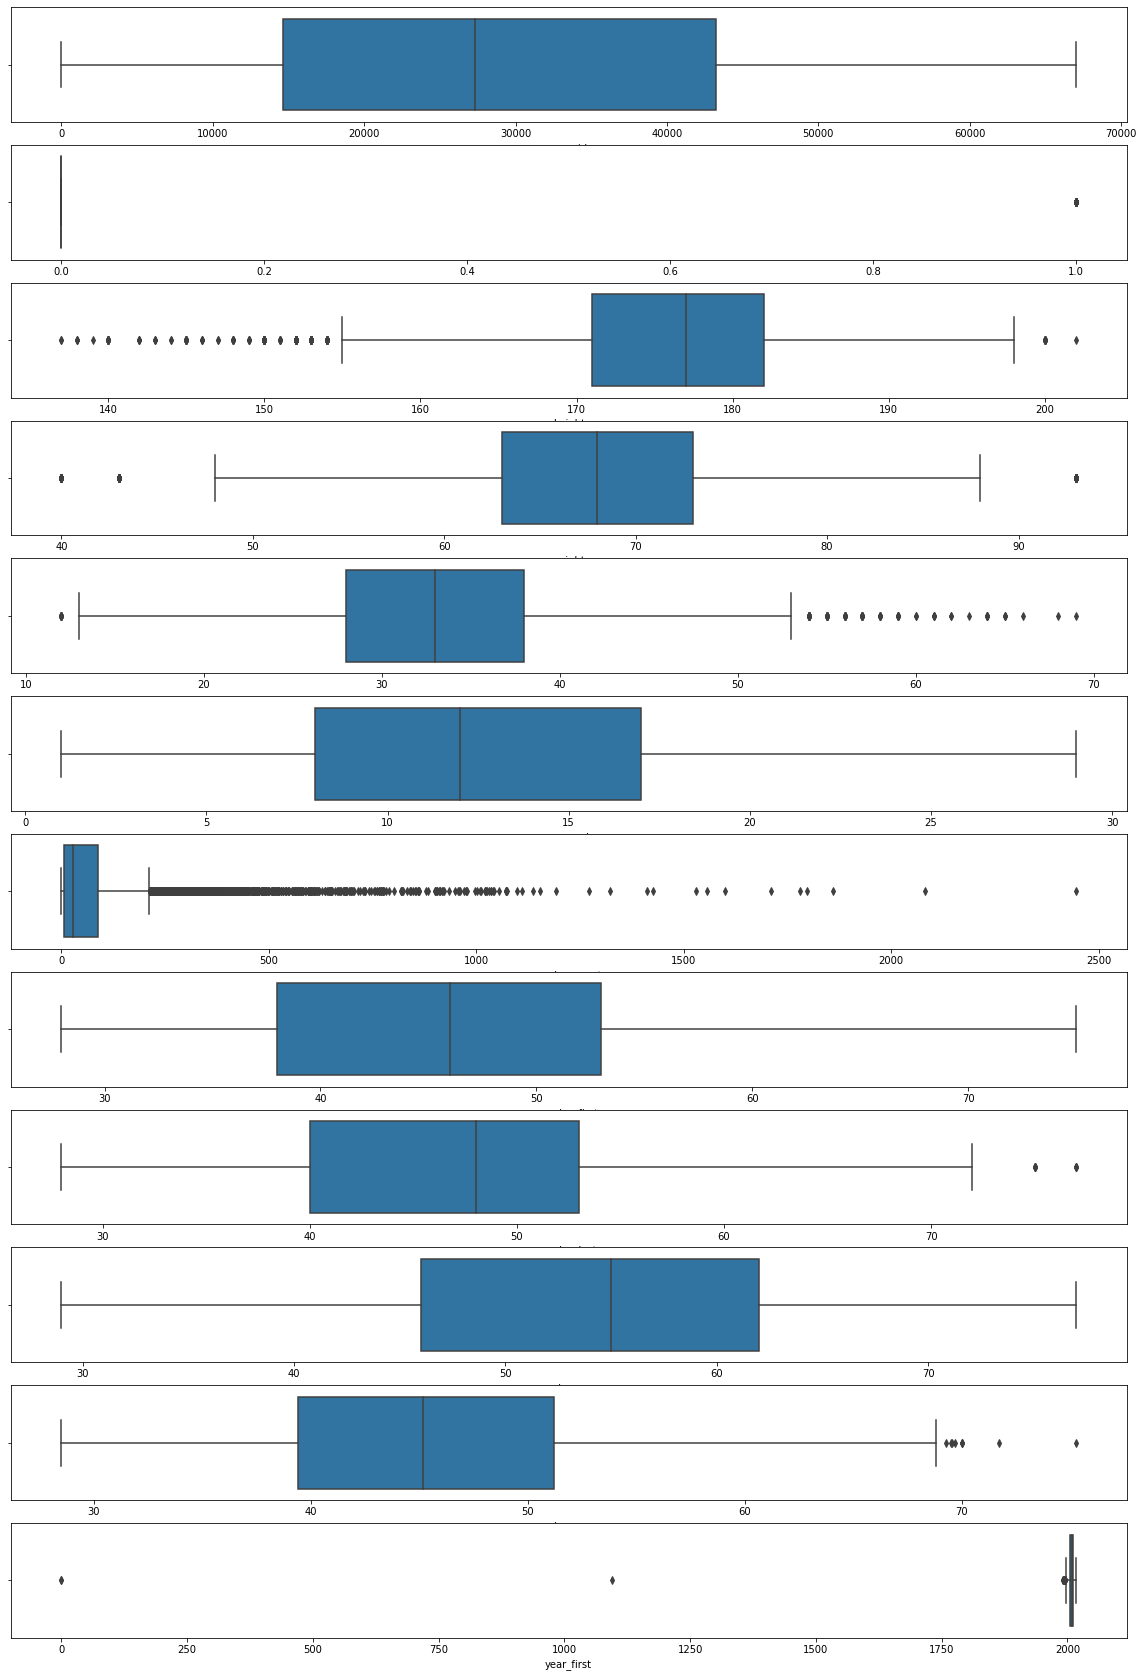

In [ ]:
fig, ax = plt.subplots(12, 1, figsize=(20,30))

df_number = scaler.select_dtypes(include = np.number)

for i in range(len(df_number.columns)):
    sns.boxplot(x = df_number.columns[i], data = df_number, ax = ax[i])
plt.show()

In [83]:
scaler["weight"].max()

93